In [12]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from ai_utils import ai_helpers

np.random.seed(6)
BATCH_SIZE = 4

In [13]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from ai_utils import ai_helpers

np.random.seed(6)
BATCH_SIZE = 4

(X_train, Y_train), (x_test, y_test) = mnist.load_data(path='.\\data')
X_train = X_train.astype('float32') / 255
X_train, x_val = X_train[:-10000], X_train[-10000:]
Y_train, y_val = Y_train[:-10000], Y_train[-10000:]

X_train, Y_train = shuffle(X_train, Y_train)
X_feed = X_train[BATCH_SIZE]
y_feed = Y_train[BATCH_SIZE]

Y_train = to_categorical(Y_train, num_classes=10)
y_val = to_categorical(Y_train, num_classes=10)
y_test = to_categorical(Y_train, num_classes=10)


TypeError: %i format: a number is required, not numpy.ndarray

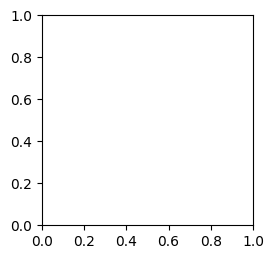

In [15]:
## Let's look at some example
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%Y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray')

Y_train = to_categorical(Y_train, num_classes=10)
y_val = to_categorical(Y_train, num_classes=10)
y_test = to_categorical(Y_train, num_classes=10)


In [39]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.utils import shuffle

class Dense:
    def __init__(self, input_size, output_size, learning_rate=0.1):
        self.weights = np.random.randn(output_size, input_size)
        self.biases = np.zeros((output_size, 1))
        self.learning_rate = learning_rate

    def forward_propagate(self, inputs):
        self.inputs = inputs
        output = np.dot(self.weights, inputs) + self.biases
        return self.relu(output)

    def backward_propagate(self, output_error):
        d_relu = self.d_relu(self.inputs)
        inputs_error = np.dot(output_error * d_relu, self.weights)
        self.weights -= np.dot(self.inputs.T, output_error * d_relu) * self.learning_rate
        self.biases -= np.sum(output_error * d_relu, axis=0) * self.learning_rate
        return inputs_error

    def relu(self, x):
        return np.maximum(0, x)

    def d_relu(self, x):
        return (x > 0).astype(float)

def mse_loss(y_true, y_pred):
    diff = y_true - y_pred
    return np.mean(diff**2), diff

(np.random.seed(6))
BATCH_SIZE = 4
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # normalize data
Y_train, Y_test = to_categorical(Y_train), to_categorical(Y_test)  # one-hot encoding
X_train, X_test = X_train.reshape((-1, 784)), X_test.reshape((-1, 784))  # flatten data

class Model():  
    def __init__(self, layers):
        self.layers = layers
  
    def forward_propagate(self, inputs):
        for layer in self.layers:
            inputs = layer.forward_propagate(inputs)
        return inputs

    def calculate_loss(self, y_true, y_pred):
        loss, delta = mse_loss(y_true, y_pred)
        return loss, delta

    def backward_propagate(self, delta):
        for layer in reversed(self.layers):
            delta = layer.backward_propagate(delta)

    def train(self, X_train, Y_train, epochs=20):
        for epoch in range(epochs):
            total_loss = 0
            shuffle_idx = np.random.permutation(len(X_train))
            for i in shuffle_idx:
                X_batch = X_train[i:i + BATCH_SIZE]
                Y_batch = Y_train[i:i + BATCH_SIZE]
                y_pred = model.forward_propagate(X_batch.T)
                loss, delta = self.calculate_loss(Y_batch.T, y_pred)
                self.backward_propagate(delta)
                total_loss += loss
            
            if epoch % 10 == 0:
                print("Epoch", epoch + 1, "out of", epochs, "loss:", total_loss / len(X_train))

layer1 = Dense(784, 128)
layer2 = Dense(128, 10)
model = Model([layer1, layer2])
model.train(X_train, Y_train, epochs=20)


ValueError: operands could not be broadcast together with shapes (10,4) (128,4) 

In [18]:
hidden_size = 64
input_size = 28 * 28
output_size = 10

layers = [Dense(input_size=input_size, output_size=hidden_size, activation_function=ai_helpers.ActivationFunctions.relu), 
           Dense(input_size=hidden_size, output_size=output_size, activation_function=ai_helpers.ActivationFunctions.softmax)]

model = Model(input_size, hidden_size, output_size, layers)
model.train(X_train, Y_train, epochs=10)

ValueError: shapes (28,28) and (784,64) not aligned: 28 (dim 1) != 784 (dim 0)